In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Polynomial regression as linear least squares

From the knowledge of a sample of pair of scalar values $\{a_i, y_i\}_{i=1}^n$, we would like to predict the relation between $x$ and $y$. One simple way to go beyond linear regression is to consider polynomial regression: for example we could try to model $y$ as a polynomial of degree 3 of $a$. We would look for $(x_0, x_1, x_2, x_3) \in \mathbb{R}^4$ such that the values $a_i$ and $y_i$ are linked as $y_i \simeq x_0 + x_1 a_i + x_2 a_i^2$.

This problem can be mapped to linear regression by considering that we have for each $a$ a feature vectors of dimension $d + 1$ when considering the fit of a polynomial of degree $d$. This feature vector is $(1, a, a^2, \cdots, a^d)$. Such that the full data matrix is
$$
    A = \left[\begin{matrix}
    1 & a_1 & \cdots & a_1^d \\
    1 & a_2 & \cdots & a_2^d \\
    \vdots & \vdots & \vdots & \vdots \\
    1 & a_n & \cdots & a_n^d
\end{matrix} \right] \in \mathbb{R}^{n \times (d+1)}.
$$

As a exercise below we will consider data that was created from a polynomial of dimension 3, to which noise is added. Assuming that we do not know the degree of the generated polynomial, we will try to fit with $d = 5$ and $d=2$ and investigate ridge regression.  

In [2]:
## Helper functions to setup the problem
def get_data_mat(a, deg):
    """
    Inputs:
    a: (np.array of size N)
    deg: (int) max degree used to generate the data matrix

    Returns:
    A: (np.array of size N x (deg_true + 1)) data matrix
    """
    A = np.array([a ** i for i in range(deg + 1)]).T
    return A

def draw_sample(deg_true, x, N, eps=0):
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    a: (np.array of size deg_true) parameter of g
    N: (int) size of sample to draw
    eps: noise level

    Returns:
    x: (np.array of size N)
    y: (np.array of size N)
    """
    a = np.sort(np.random.rand(N))
    print('a',a)
    A = get_data_mat(a, deg_true)
    y = A @ x + eps * np.random.randn(N)
    return a, y


**(a)** Complete the three functions below to obtain
- the least square estimator $x^{LS}$
- the ridge estimator $x^{Ridge}$
- the mean square error $\lVert A x - y \rVert^2 / n$

In [3]:
def least_square_estimator(A, y):
    #Your code
    A_inverse = np.linalg.pinv(A)
    x_ls = A_inverse @ y
    return x_ls


def ridge_estimator(A, y, lbd):
    #Your code
    x_ridge = np.linalg.inv(np.transpose(A) @ A + lbd * np.identity(np.shape(A)[1])) @ np.transpose(A) @ y
    return x_ridge


def mean_squared_error(x, A, y):
    #Your code
    MSE = np.linalg.norm(A @ x - y)**2 / np.shape(A)[0]
    return MSE


a [0.048522   0.07728957 0.11595071 0.16332445 0.2814473  0.4444695
 0.47280797 0.54954473 0.62739168 0.98901151]
a_tr (10,) y_tr (10,)
a [0.07454079 0.11024132 0.11056546 0.22489608 0.22695479 0.24275816
 0.25003043 0.2519502  0.31007394 0.38798252 0.40679254 0.45773799
 0.4785523  0.5574327  0.60100412 0.70637148 0.7266372  0.81887343
 0.83682945 0.92314954]
a_plot (100,)
A_plot (100, 4)


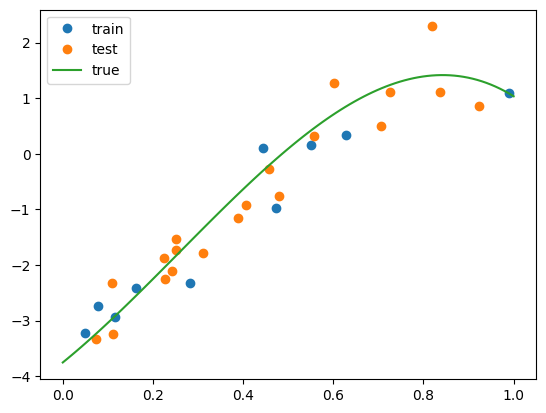

In [4]:
# This cells generates the data - for your submission do not change it.
# But for your own curiosity, do not hesistate to investigate what is going on when changing the properties of the data :)

np.random.seed(45) # fixing seed so everyone should see the same data
N = 10
deg_true = 3 # degree of true polynomial
eps = 0.5 # noise amplitude
x_true = np.array([-3.75307359,  6.58178662,  6.23070014, -8.02457871])

# radom input data
a_tr, y_tr = draw_sample(deg_true, x_true, N, eps=eps) # training data
print('a_tr',a_tr.shape,'y_tr',y_tr.shape)
a_te, y_te = draw_sample(deg_true, x_true, 2 * N, eps=eps) # testing data

a_plot = np.linspace(0, 1, 100)
A_plot = get_data_mat(a_plot, deg_true) #A_plot is the input matrix
print('a_plot',a_plot.shape)
print('A_plot',A_plot.shape)
plt.plot(a_tr, y_tr,'o', label='train')
plt.plot(a_te, y_te,'o', label='test')
plt.plot(a_plot, A_plot @ x_true,'-', label='true')
plt.legend()

**(b)** Complete the code below to visualize the prediction of $x^{LS}$ and $x^{Ridge}$ for $\lambda$ in $[1e-7, 0.1, 1]$, using in all cases a prediction model of degree 5. The output of the cell should be a plot as above, where you added three lines of predictions for all values of $a \in [0,1]$: line LS, line ridge $\lambda = 1e-7$, line ridge $\lambda = 0.1$, line ridge $\lambda = 1$.

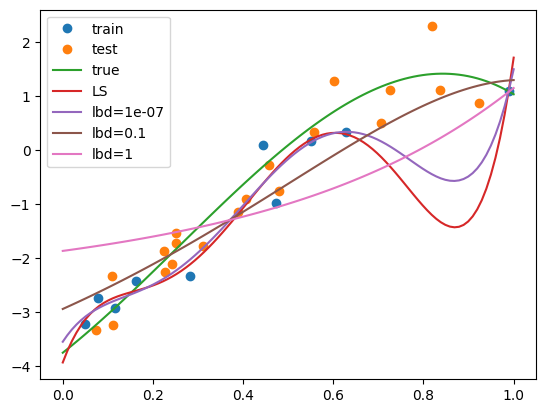

In [5]:
a_plot = np.linspace(0, 1, 100)
A_plot = get_data_mat(a_plot, deg_true) #A_plot: input data matrix
plt.plot(a_tr, y_tr,'o', label='train')
plt.plot(a_te, y_te,'o', label='test')
plt.plot(a_plot, A_plot @ x_true,'-', label='true')

deg_pred = 5

A_tr = get_data_mat(a_tr, deg_pred)
A_te = get_data_mat(a_te, deg_pred)

x_ls = least_square_estimator(A_tr,y_tr)#your code ..

A_plot = get_data_mat(a_plot, deg_pred)
plt.plot(a_plot, A_plot @ x_ls, label='LS')

for lbd in [1e-7, 0.1, 1]:
   #your code
   x_ridge = ridge_estimator(A_tr,y_tr,lbd)
   plt.plot(a_plot, A_plot @ x_ridge, label='lbd='+str(lbd))
plt.legend()


## To see which lambda gives the most accurate prediction, we want to see which graph is more closer to the blue dots. Since it is not possible to directly predict on the true model, we should NOT compare the model to the green curve in any case.

**(c)** Use the `mean_squared_error` to make a plot of the training error and the test error as a function of $\lambda$ as we have seen in the lecture (range given below). Which value of $\lambda$ would you choose? Does that align with your intuition from the plots above?

lbds [1.00000000e-07 4.64158883e-07 2.15443469e-06 1.00000000e-05
 4.64158883e-05 2.15443469e-04 1.00000000e-03 4.64158883e-03
 2.15443469e-02 1.00000000e-01]


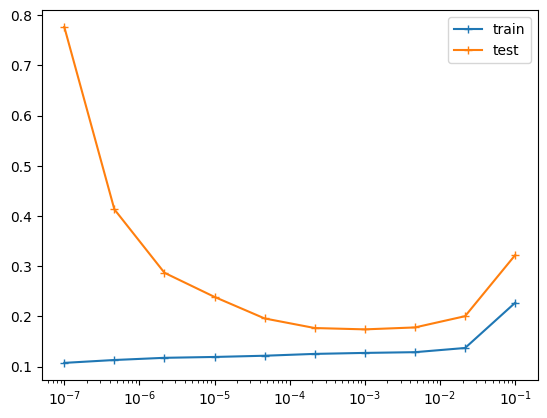

In [6]:
tr_mse = []
te_mse = []
lbds = np.logspace(-7, -1, 10)
print('lbds',lbds)
for lbd in lbds:
    # your code
    x_ridge = ridge_estimator(A_tr,y_tr,lbd)
    train_error = mean_squared_error(x_ridge,A_tr,y_tr)
    test_error = mean_squared_error(x_ridge,A_te,y_te)

    tr_mse.append(train_error)# your code)
    te_mse.append(test_error)# your code)

plt.plot(lbds, tr_mse, '-+', label='train')
plt.plot(lbds, te_mse,'-+', label='test')
plt.xscale('log')
plt.legend()



## Quantitatively speaking, the lambda = 1e-7 gives the smallest traianing loss but a large testing error. This is due to overfitting.

## I think lambda=1e-3 gives the smallest testing error. For the next question, I choose lambda=1e-3 as the optimal ridge regression model.

**(d)** For the optimal value of $\lambda$ compare $x^{LS}$, $x^{Ridge}$ and $x^{true}$.   


In [7]:
x_ls_norm = np.linalg.norm(x_ls)

x_ridge = ridge_estimator(A_tr,y_tr,lbd=1e-3)
x_ridge_norm=np.linalg.norm(x_ridge)

x_true_norm = np.linalg.norm(x_true)

print('x_ls_norm',x_ls_norm)
print('x_ridge_norm',x_ridge_norm)
print('x_true_norm',x_true_norm)

x_ls_norm 948.743396260961
x_ridge_norm 7.630508099714627
x_true_norm 12.67363263593938


## We can tell that x_true_norm < x_ls_norm. This is align with the conclusion from Problem 10.2(c) where x_LS can be regarded as lbd=0.

## The x_true_norm is in between. But dim(x_true) is different from the dimension of x_LS and X_ridge. I am not sure whether the comparison between different dimsions makes sense.  

(e) Repeat the same operation with a fitting model of degree 2 (`deg_pred=2`). What are your findings related to the optimal degree of regularizations in this case?

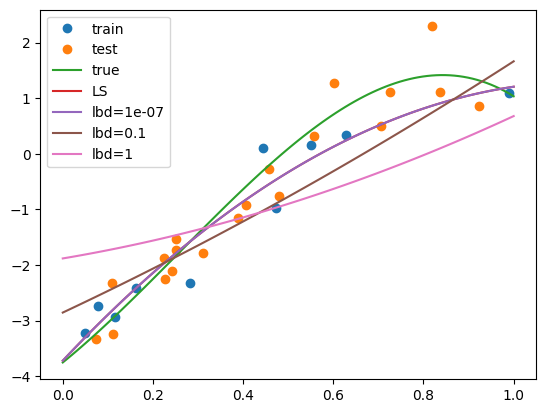

In [8]:
a_plot = np.linspace(0, 1, 100)
A_plot = get_data_mat(a_plot, deg_true) #A_plot: input data matrix
plt.plot(a_tr, y_tr,'o', label='train')
plt.plot(a_te, y_te,'o', label='test')
plt.plot(a_plot, A_plot @ x_true,'-', label='true')

deg_pred = 2

A_tr = get_data_mat(a_tr, deg_pred)
A_te = get_data_mat(a_te, deg_pred)

x_ls = least_square_estimator(A_tr,y_tr)#your code ..

A_plot = get_data_mat(a_plot, deg_pred)
plt.plot(a_plot, A_plot @ x_ls, label='LS')

for lbd in [1e-7, 0.1, 1]:
   #your code
   x_ridge = ridge_estimator(A_tr,y_tr,lbd)
   plt.plot(a_plot, A_plot @ x_ridge, label='lbd='+str(lbd))
plt.legend()


lbds [1.00000000e-07 4.64158883e-07 2.15443469e-06 1.00000000e-05
 4.64158883e-05 2.15443469e-04 1.00000000e-03 4.64158883e-03
 2.15443469e-02 1.00000000e-01]


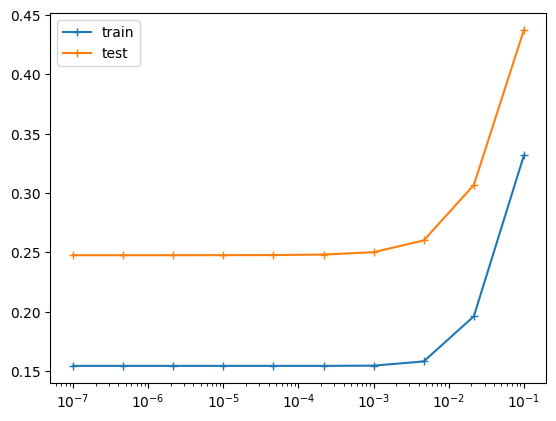

In [9]:
tr_mse = []
te_mse = []
lbds = np.logspace(-7, -1, 10)
print('lbds',lbds)
for lbd in lbds:
    # your code
    x_ridge = ridge_estimator(A_tr,y_tr,lbd)
    train_error = mean_squared_error(x_ridge,A_tr,y_tr)
    test_error = mean_squared_error(x_ridge,A_te,y_te)

    tr_mse.append(train_error)# your code)
    te_mse.append(test_error)# your code)

plt.plot(lbds, tr_mse, '-+', label='train')
plt.plot(lbds, te_mse,'-+', label='test')
plt.xscale('log')
plt.legend()

## I notice that the smallest testing error when deg=2 is greater than the smallest testing error when deg=5. It implies that deg=5 is a better model in the sense that fits the data better than deg=2.

In [10]:
x_ls_norm = np.linalg.norm(x_ls)

x_ridge = ridge_estimator(A_tr,y_tr,lbd=1e-3)
x_ridge_norm=np.linalg.norm(x_ridge)

x_true_norm = np.linalg.norm(x_true)

print('x_ls_norm',x_ls_norm)
print('x_ridge_norm',x_ridge_norm)
print('x_true_norm',x_true_norm)

x_ls_norm 10.108055711630747
x_ridge_norm 9.897668263832951
x_true_norm 12.67363263593938
